In [16]:
#```{r results='hide', message=FALSE, warning=FALSE}
# install all Packages required
# install.packages('ggplot2')
# Load Libraries to be used
library(ggplot2)
library(knitr)
library(dplyr)
library(tidyverse)
library(summarytools)
library(visdat)
library(igraph)
#library(treemap)
#library(dplyr)
library(devtools)
library("readxl")
library(repr)
library(forecast)
#install.packages("readxl")
#install.packages("lubridate")
#install.packages("forecast")
# my_data <- read_excel(file.choose())
#```# Do not show warnings

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [3]:
# Change plot size to 12 x 12
options(repr.plot.width=12, repr.plot.height=12)

In [4]:
sales_df <- read_excel("Data/adfc-03.xlsx", sheet="Data")
head(sales_df)

Date,Sales
<dttm>,<dbl>
1995-01-01,1463.9
1995-02-01,1373.3
1995-03-01,1533.7
1995-04-01,1420.6
1995-05-01,1576.3
1995-06-01,1607.5


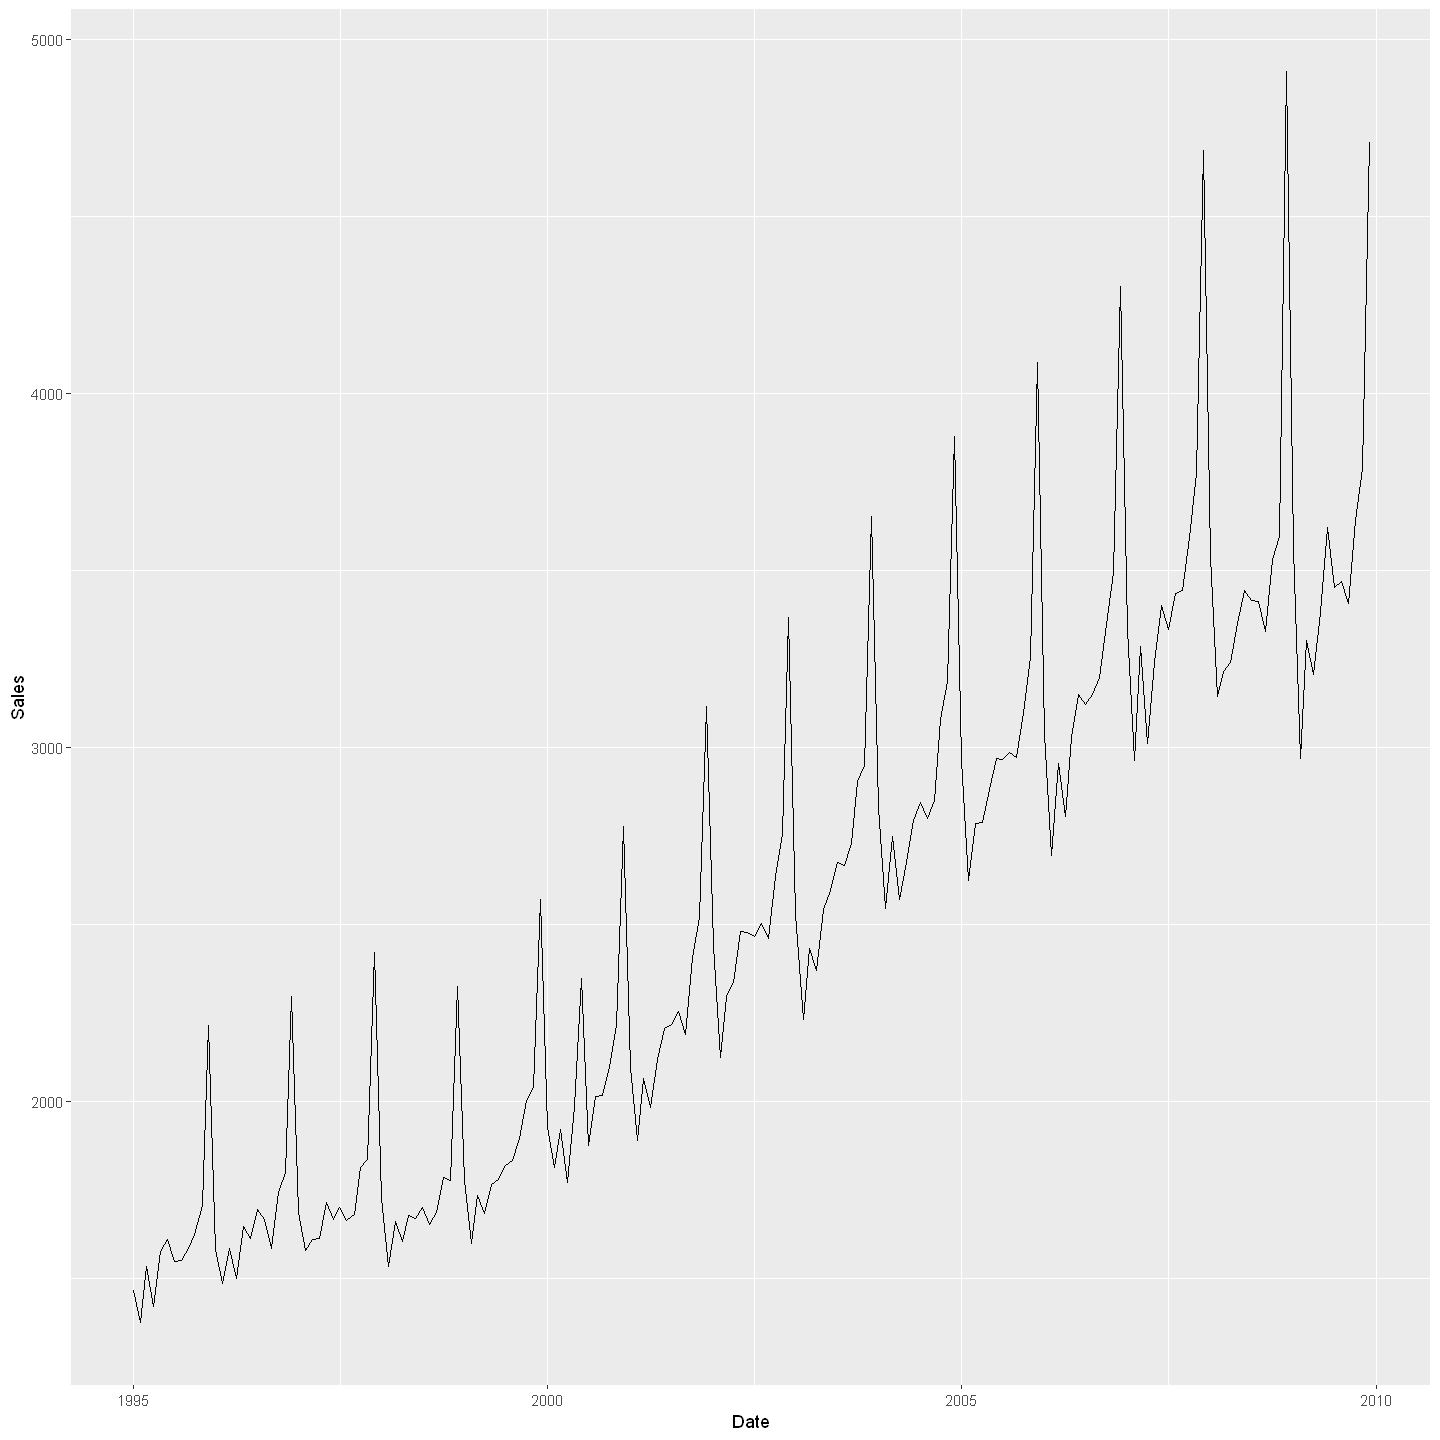

In [5]:
ggplot(sales_df, aes(Date,Sales))+geom_line()

In [12]:
#create an index of time
sales_df$time<- seq(1,nrow(sales_df))
sales_df$month <- as.character(lubridate::month(sales_df$Date))

In [13]:
monthly <- sales_df %>% group_by(month) %>% summarize(mean=mean(Sales))
sales_df$year <- lubridate::year(sales_df$Date)
lastYear <- sales_df %>% filter(year==2009)

`summarise()` ungrouping output (override with `.groups` argument)



In [14]:
head(sales_df)

Date,Sales,time,month,year
<dttm>,<dbl>,<int>,<chr>,<dbl>
1995-01-01,1463.9,1,1,1995
1995-02-01,1373.3,2,2,1995
1995-03-01,1533.7,3,3,1995
1995-04-01,1420.6,4,4,1995
1995-05-01,1576.3,5,5,1995
1995-06-01,1607.5,6,6,1995


In [15]:
install.packages("forecast")

Installing package into 'C:/Users/woosh/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

also installing the dependencies 'xts', 'TTR', 'quadprog', 'quantmod', 'fracdiff', 'tseries', 'urca', 'RcppArmadillo'




package 'xts' successfully unpacked and MD5 sums checked
package 'TTR' successfully unpacked and MD5 sums checked
package 'quadprog' successfully unpacked and MD5 sums checked
package 'quantmod' successfully unpacked and MD5 sums checked
package 'fracdiff' successfully unpacked and MD5 sums checked
package 'tseries' successfully unpacked and MD5 sums checked
package 'urca' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\woosh\AppData\Local\Temp\Rtmp6ppStO\downloaded_packages


In [17]:
sales_df.ts <- ts(sales_df$Sales,frequency = 12)

In [21]:
sales_df.ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,1463.9,1373.3,1533.7,1420.6,1576.3,1607.5,1545.7,1550.8,1583.0,1622.6,1705.5,2212.4
2,1580.7,1485.5,1582.6,1498.9,1644.5,1610.9,1695.0,1664.9,1583.8,1740.4,1798.7,2296.1
3,1686.0,1576.9,1608.8,1610.8,1712.9,1664.3,1698.0,1662.9,1678.9,1811.1,1835.5,2418.4
4,1724.9,1531.3,1660.0,1602.0,1677.0,1668.8,1699.6,1649.9,1685.0,1783.6,1776.0,2323.2
5,1775.4,1597.2,1733.6,1681.0,1764.5,1779.0,1817.4,1830.7,1894.3,2000.7,2037.0,2568.3
6,1924.7,1813.6,1919.9,1769.8,1985.7,2346.3,1875.7,2013.1,2015.7,2098.2,2213.3,2776.0
7,2095.8,1887.4,2063.2,1982.7,2118.3,2205.1,2217.5,2253.1,2188.7,2404.9,2517.4,3113.9
8,2438.8,2123.9,2296.4,2336.0,2478.6,2475.0,2465.3,2501.2,2460.6,2635.3,2752.9,3366.1
9,2528.5,2231.8,2430.7,2368.9,2539.9,2595.6,2675.1,2665.2,2726.7,2903.8,2948.3,3650.5
10,2829.9,2545.4,2746.3,2569.2,2675.2,2793.8,2843.3,2798.1,2848.0,3078.3,3185.1,3877.3


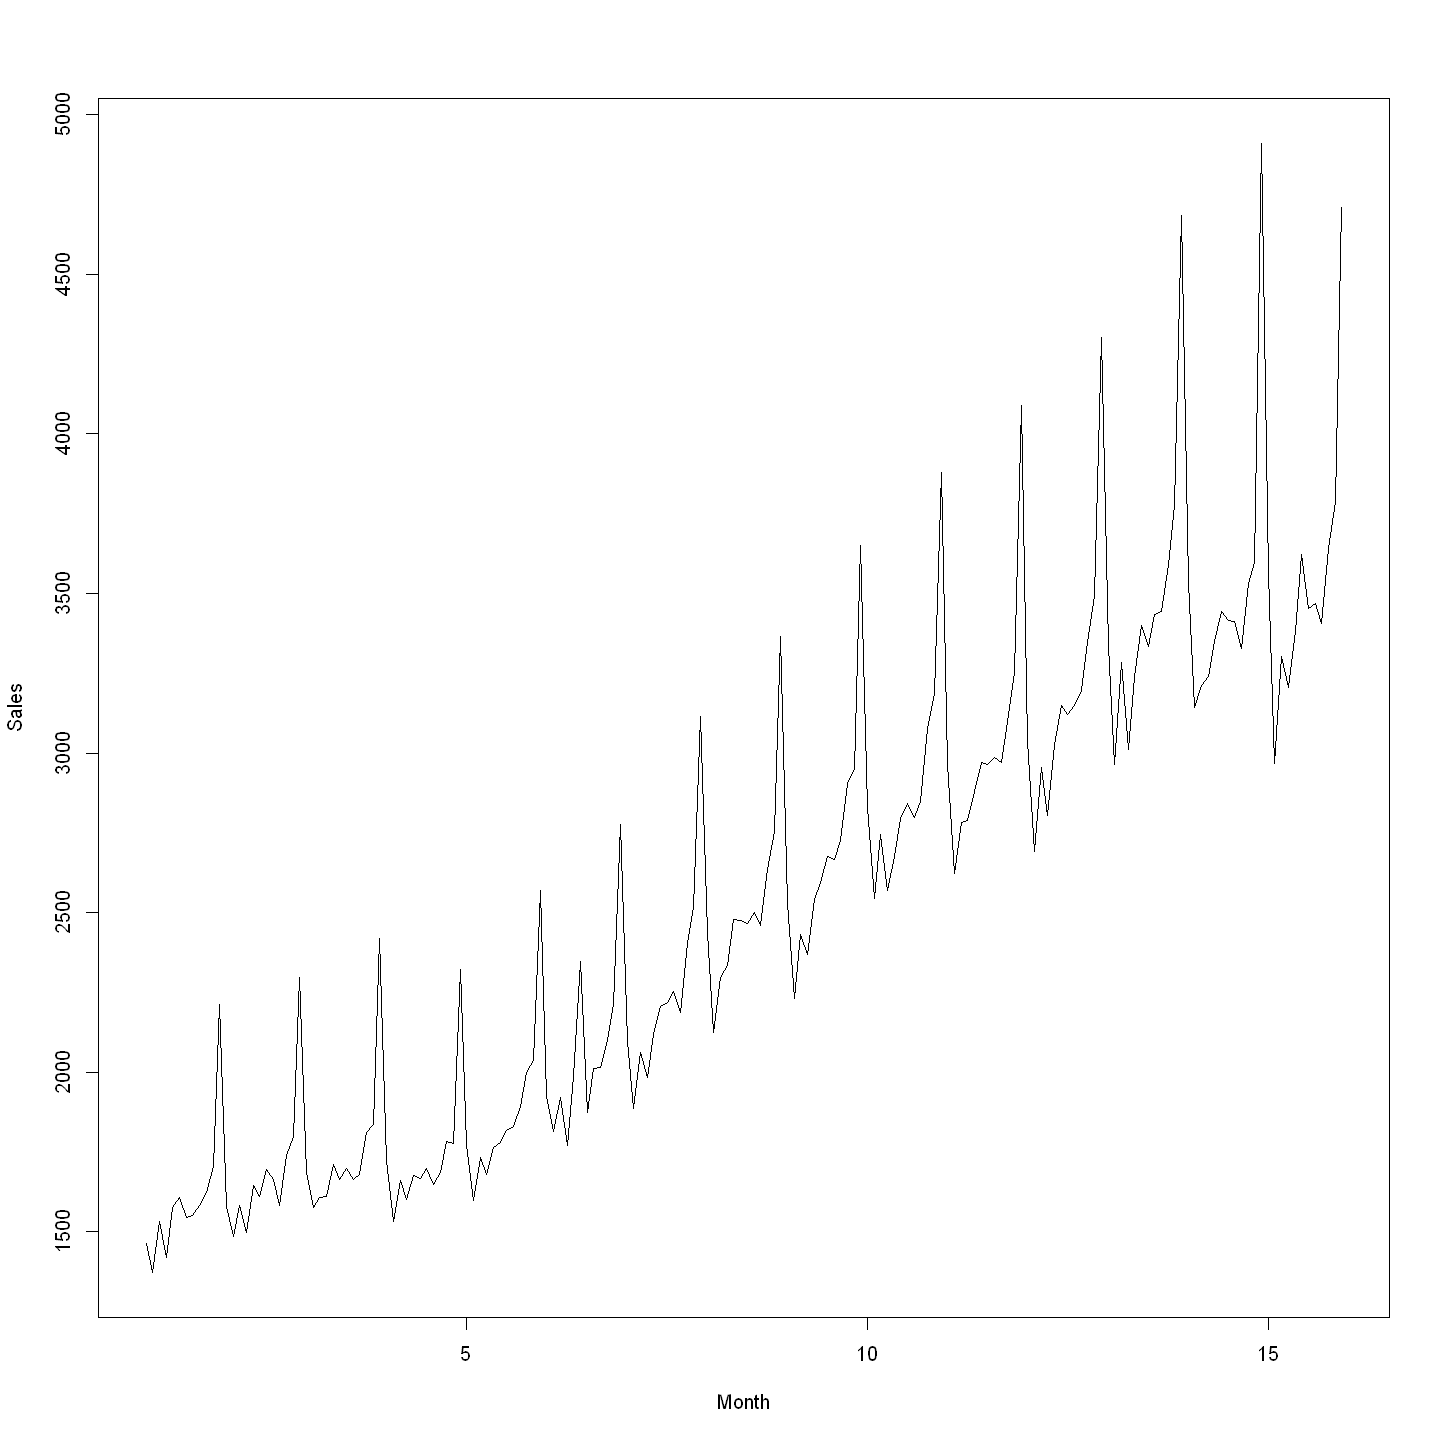

In [23]:
plot(sales_df.ts, xlab='Month', ylab='Sales')

In [24]:
ntrain = 168
ntest = 12

In [26]:
train.ts <-window(sales_df.ts, start=c(1,1), end=c(1,ntrain))
test.ts <- window(sales_df.ts, start=c(1,ntrain+1), end=c(1,ntrain+ntest))

In [31]:
naive.pred <- naive(train.ts, h=ntest)
snaive.pred <- snaive(train.ts, h=ntest)

In [33]:
devtools::install_github("mlr-org/measures")

v  checking for file 'C:\Users\woosh\AppData\Local\Temp\Rtmp6ppStO\remotes41681cad3a2a\pat-s-measures-6d4762c/DESCRIPTION' (496ms)
-  preparing 'measures': (548ms)
v  checking DESCRIPTION meta-information
-  checking for LF line-endings in source and make files and shell scripts (543ms)
-  checking for empty or unneeded directories
-  building 'measures_0.2.tar.gz'
   


Installing package into 'C:/Users/woosh/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



In [35]:
fit <- measures::RMSE(test.ts,naive.pred$mean)
fit

[1] 1426.687

In [36]:
mod <- lm(Sales ~ time, data=sales_df)
print(summary(mod), digits=2)


Call:
lm(formula = Sales ~ time, data = sales_df)

Residuals:
   Min     1Q Median     3Q    Max 
  -623   -196    -48     81   1344 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1299.41      46.40      28   <2e-16 ***
time           13.48       0.44      30   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 310 on 178 degrees of freedom
Multiple R-squared:  0.84,	Adjusted R-squared:  0.84 
F-statistic: 9.2e+02 on 1 and 178 DF,  p-value: <2e-16



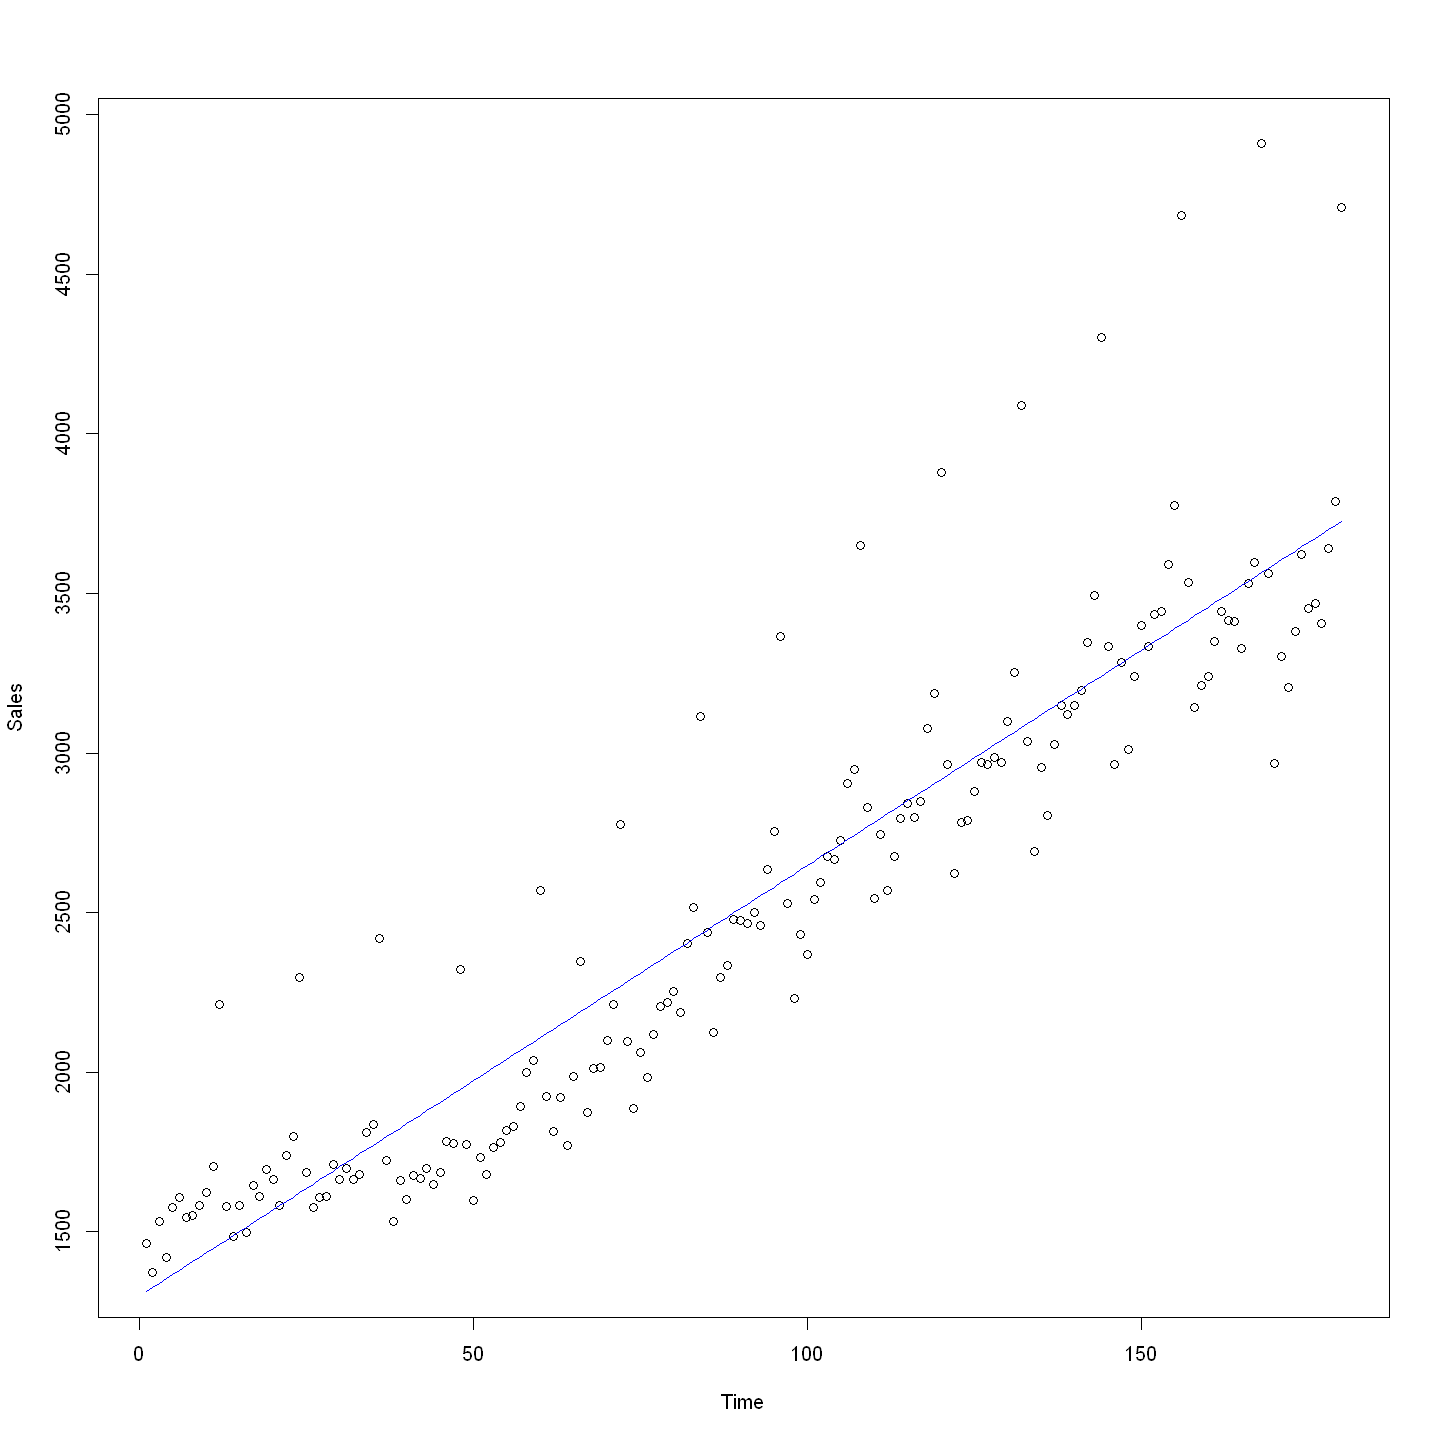

In [38]:

pred <- predict(mod,sales_df)
plot(sales_df$Sales, ylab='Sales', xlab='Time')
lines(pred, lwd=1,col="blue", lty=1)

In [40]:
mod <- lm(Sales ~ time + I(time^2) + factor(month), data=sales_df)
print(summary(mod), digits=2)


Call:
lm(formula = Sales ~ time + I(time^2) + factor(month), data = sales_df)

Residuals:
   Min     1Q Median     3Q    Max 
  -441    -79      6     98    464 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.4e+03    4.7e+01    30.2   <2e-16 ***
time             9.3e+00    8.2e-01    11.4   <2e-16 ***
I(time^2)        2.2e-02    4.4e-03     5.0    2e-06 ***
factor(month)10  6.9e+01    5.2e+01     1.3    0.188    
factor(month)11  1.5e+02    5.2e+01     2.8    0.005 ** 
factor(month)12  8.4e+02    5.2e+01    16.2   <2e-16 ***
factor(month)2  -2.7e+02    5.2e+01    -5.3    4e-07 ***
factor(month)3  -1.2e+02    5.2e+01    -2.3    0.025 *  
factor(month)4  -2.1e+02    5.2e+01    -4.1    7e-05 ***
factor(month)5  -8.1e+01    5.2e+01    -1.6    0.121    
factor(month)6  -8.8e+00    5.2e+01    -0.2    0.865    
factor(month)7  -5.6e+01    5.2e+01    -1.1    0.282    
factor(month)8  -5.5e+01    5.2e+01    -1.1    0.293    
factor(month)9  -7.0e+01

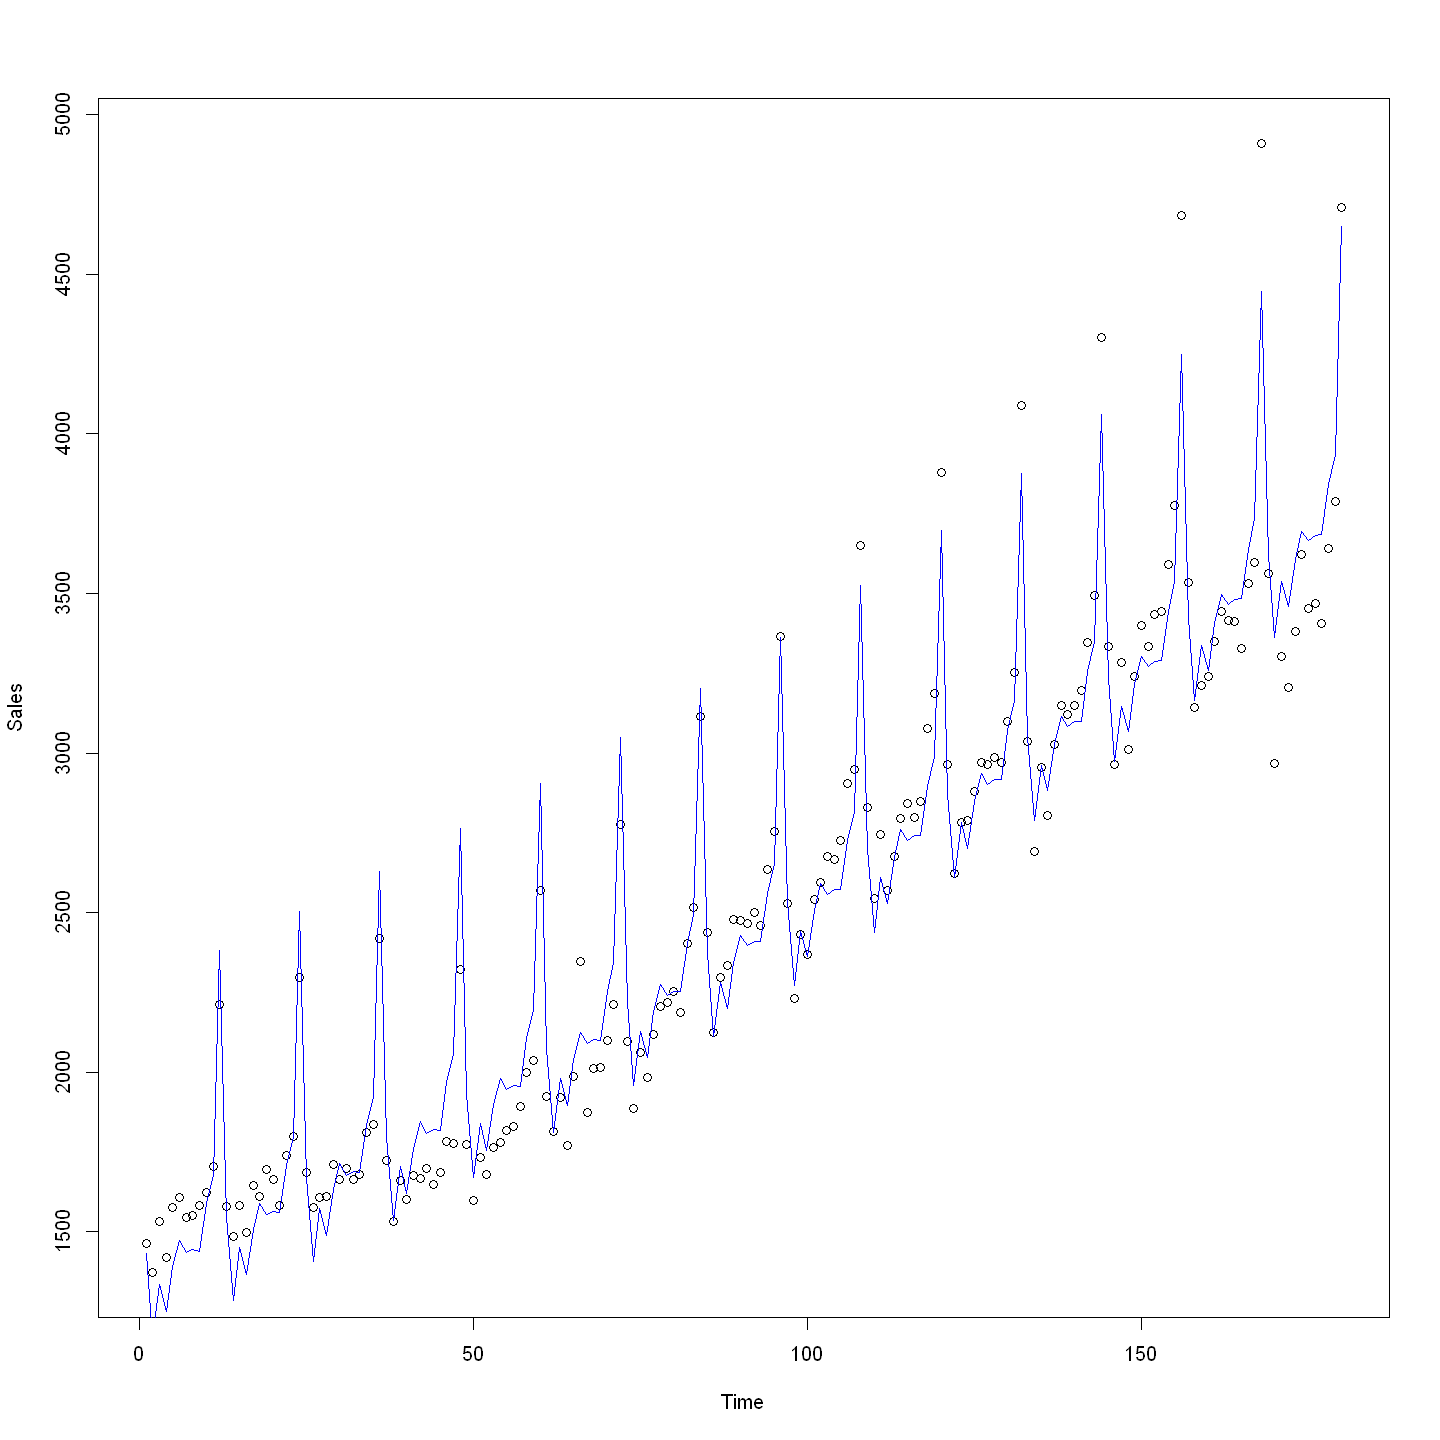

In [42]:
pred <- predict(mod,sales_df)
plot(sales_df$Sales, ylab='Sales', xlab='Time')
lines(pred, lwd=1,col="blue", lty=1)